<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-26 22:28:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  49.7MB/s    in 3.1s    

2025-01-26 22:29:02 (49.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [2]:
num_rows, num_columns = df.shape
print(f"Number of observations (rows): {num_rows}")
#missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(df.isnull().sum())


Number of observations (rows): 65437
ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
Lan

In [3]:
# Impute missing values for multiple columns with mode
#for col in ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith']:
 #   df[col] = df[col].fillna(df[col].mode()[0])


#print(df.isnull().sum())

#df_cleaned = df.dropna(subset=['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith'])

# Verify that the rows have been dropped
#print(f"Number of rows after dropping missing values: {df_cleaned.shape[0]}")

In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



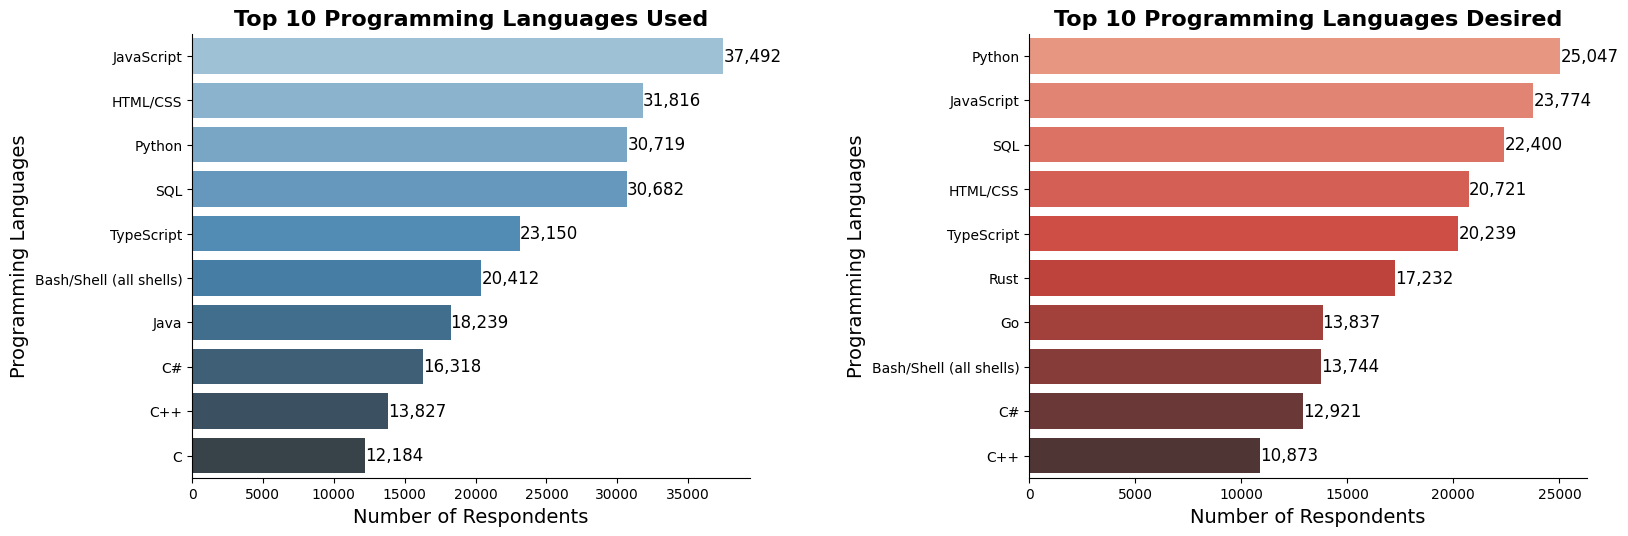

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each programming language for the current and next year
languages_current = df['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
languages_next_year = df['LanguageWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Count the frequency of each language and get the top 10
top_languages_current = languages_current.value_counts().head(10)
top_languages_next_year = languages_next_year.value_counts().head(10)

# Set up a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Increase overall figure width

# Plot the top languages currently worked with
sns.barplot(x=top_languages_current.values, y=top_languages_current.index, 
            palette="Blues_d", orient='h', ax=axes[0], hue=top_languages_current.index, legend=False)
axes[0].set_title('Top 10 Programming Languages Used', fontsize=16, fontweight='bold', family='sans-serif')
axes[0].set_xlabel('Number of Respondents', fontsize=14, family='sans-serif')
axes[0].set_ylabel('Programming Languages', fontsize=14, family='sans-serif')

# Annotate the bars with the number of respondents 
for index, value in enumerate(top_languages_current.values):
    formatted_value = '{:,.0f}'.format(value)  # Format with commas
    axes[0].text(value + 0.5, index, formatted_value, ha='left', va='center', fontsize=12, color='black')

sns.despine(ax=axes[0])  # Remove the frame (spines) around the plot
axes[0].grid(False)  # Remove gridlines

# Plot the top languages respondents want to work with next year
sns.barplot(x=top_languages_next_year.values, y=top_languages_next_year.index, 
            palette="Reds_d", orient='h', ax=axes[1], hue=top_languages_next_year.index, legend=False)
axes[1].set_title('Top 10 Programming Languages Desired', 
                  fontsize=16, fontweight='bold', family='sans-serif')
axes[1].set_xlabel('Number of Respondents', fontsize=14, family='sans-serif')
axes[1].set_ylabel('Programming Languages', fontsize=14, family='sans-serif')

# Annotate the bars with the number of respondents 
for index, value in enumerate(top_languages_next_year.values):
    formatted_value = '{:,.0f}'.format(value)  # Format with commas
    axes[1].text(value + 0.5, index, formatted_value, ha='left', va='center', fontsize=12, color='black')

sns.despine(ax=axes[1])  # Remove the frame (spines) around the plot
axes[1].grid(False)  # Remove gridlines

# Adjust layout to avoid overlap and add more space between subplots
plt.subplots_adjust(wspace=0.5, top=0.85)  # Increase space between subplots and top margin

# Save the figure
plt.savefig('languages.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


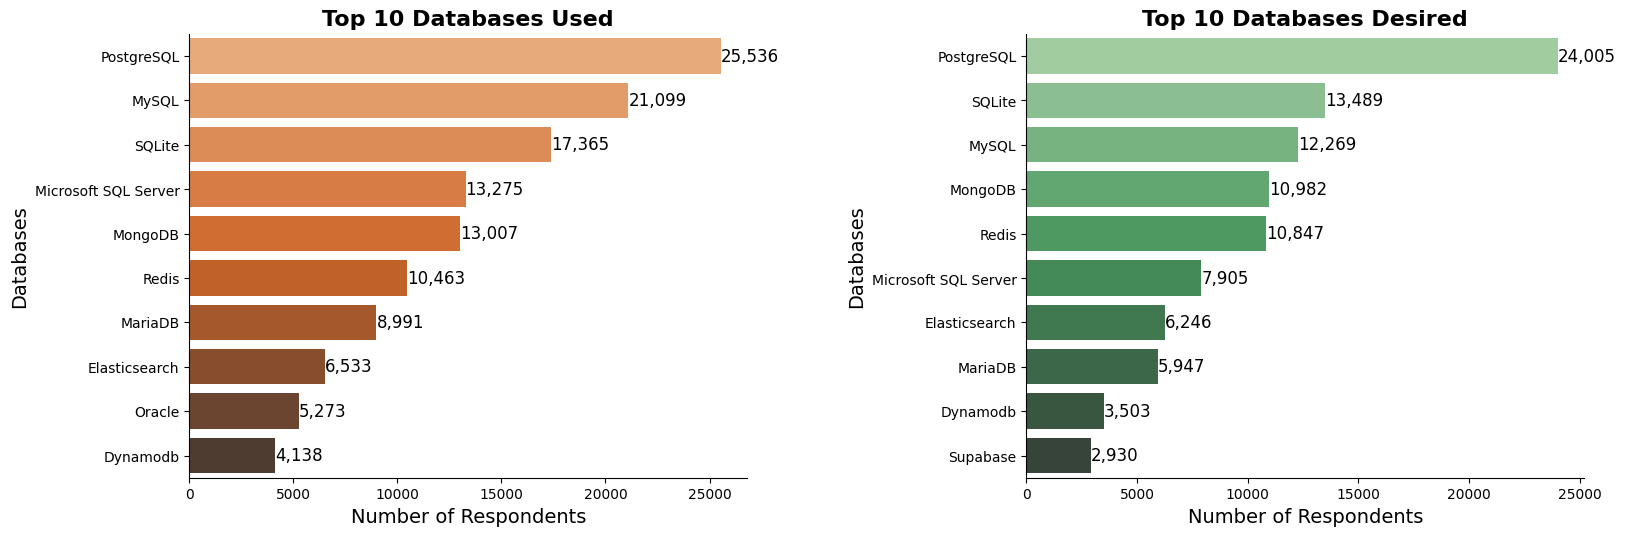

In [5]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each database for the current and next year
databases_current = df['DatabaseHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
databases_next_year = df['DatabaseWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Count the frequency of each database and get the top 10
top_databases_current = databases_current.value_counts().head(10)
top_databases_next_year = databases_next_year.value_counts().head(10)

# Set up a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Increase overall figure width

# Plot the top databases currently worked with
sns.barplot(x=top_databases_current.values, y=top_databases_current.index, 
            palette="Oranges_d", orient='h', ax=axes[0], hue=top_databases_current.index, legend=False)
axes[0].set_title('Top 10 Databases Used', fontsize=16, fontweight='bold', family='sans-serif')
axes[0].set_xlabel('Number of Respondents', fontsize=14, family='sans-serif')
axes[0].set_ylabel('Databases', fontsize=14, family='sans-serif')

# Annotate the bars with the number of respondents 
for index, value in enumerate(top_databases_current.values):
    formatted_value = '{:,.0f}'.format(value)  # Format with commas
    axes[0].text(value + 0.5, index, formatted_value, ha='left', va='center', fontsize=12, color='black')

sns.despine(ax=axes[0])  # Remove the frame (spines) around the plot
axes[0].grid(False)  # Remove gridlines

# Plot the top databases respondents want to work with next year
sns.barplot(x=top_databases_next_year.values, y=top_databases_next_year.index, 
            palette="Greens_d", orient='h', ax=axes[1], hue=top_databases_next_year.index, legend=False)
axes[1].set_title('Top 10 Databases Desired', 
                  fontsize=16, fontweight='bold', family='sans-serif')
axes[1].set_xlabel('Number of Respondents', fontsize=14, family='sans-serif')
axes[1].set_ylabel('Databases', fontsize=14, family='sans-serif')

# Annotate the bars with the number of respondents 
for index, value in enumerate(top_databases_next_year.values):
    formatted_value = '{:,.0f}'.format(value)  # Format with commas
    axes[1].text(value + 0.5, index, formatted_value, ha='left', va='center', fontsize=12, color='black')

sns.despine(ax=axes[1])  # Remove the frame (spines) around the plot
axes[1].grid(False)



# Adjust layout to avoid overlap and add more space between subplots
plt.subplots_adjust(wspace=0.5, top=0.85)  # Increase space between subplots and top margin

# Save the figure
plt.savefig('database.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()



In [6]:
import pandas as pd

# Load the dataset (if not already loaded)
df = pd.read_csv("survey-data.csv")

# Step 1: Check unique values in 'JobSat'
job_sat_unique_values = df['JobSat'].unique()
print("Unique values in 'JobSat':", job_sat_unique_values)

# Step 2: Check unique values in 'Age'
age_unique_values = df['Age'].unique()
print("Unique values in 'Age':", age_unique_values)

# Count how many unique 'Age' values there are
print("Number of unique 'Age' categories:", len(age_unique_values))


Unique values in 'JobSat': [nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]
Unique values in 'Age': ['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']
Number of unique 'Age' categories: 8


In [7]:

print(df['RemoteWork'].unique())



['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']


In [8]:

print(df['JobSat'].unique())



[nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


/tmp/ipykernel_1938/699251963.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['JobSat_Label'] = df_cleaned['JobSat'].map(job_sat_map)


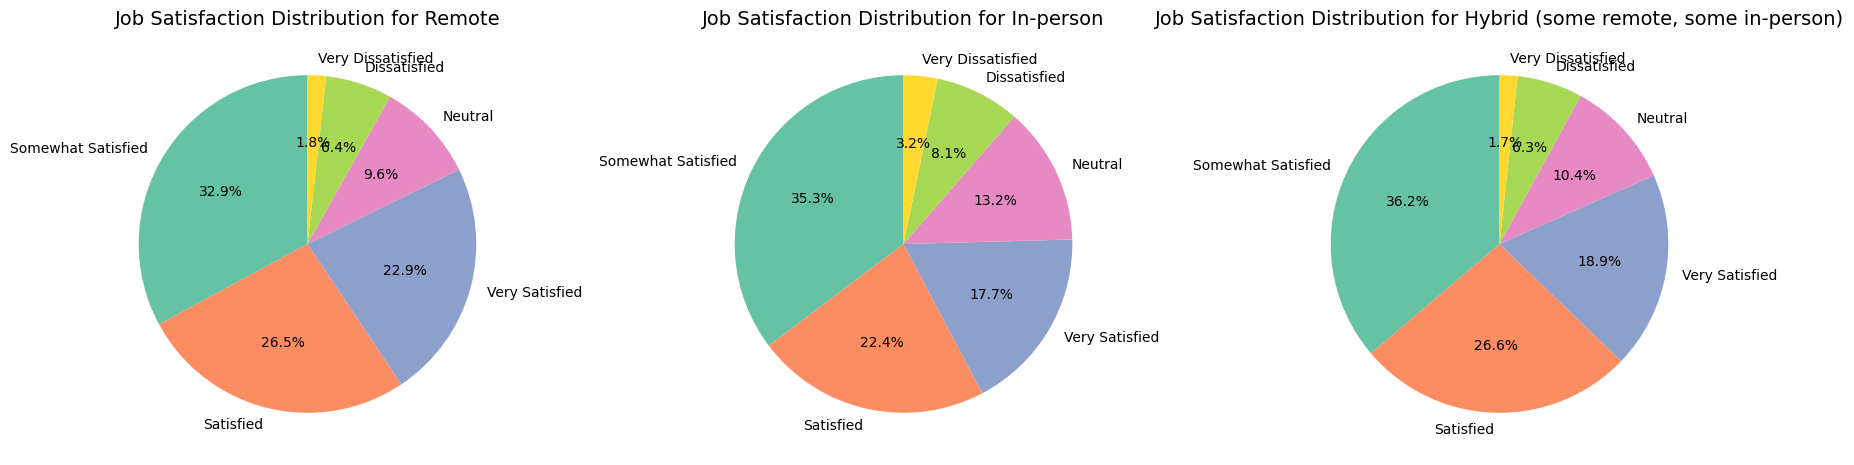

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, filter out missing values from both 'JobSat' and 'RemoteWork'
df_cleaned = df.dropna(subset=['JobSat', 'RemoteWork'])

# Mapping job satisfaction levels (based on the scale)
job_sat_map = {
    0: 'Very Dissatisfied', 1: 'Very Dissatisfied', 2: 'Dissatisfied', 3: 'Dissatisfied',
    4: 'Neutral', 5: 'Neutral', 6: 'Somewhat Satisfied', 7: 'Somewhat Satisfied', 
    8: 'Satisfied', 9: 'Very Satisfied', 10: 'Very Satisfied'
}

# Apply the mapping to the 'JobSat' column
df_cleaned['JobSat_Label'] = df_cleaned['JobSat'].map(job_sat_map)

# Set up a 1x3 grid of subplots (one for each remote work category)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the three remote work categories to generate pie charts
for i, remote_category in enumerate(['Remote', 'In-person', 'Hybrid (some remote, some in-person)']):
    # Filter the data for the specific remote work category
    category_data = df_cleaned[df_cleaned['RemoteWork'] == remote_category]
    
    # Count the occurrences of each job satisfaction level
    job_sat_counts = category_data['JobSat_Label'].value_counts()

    # Plot the pie chart for each remote work category
    axes[i].pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=sns.color_palette("Set2", len(job_sat_counts)))
    axes[i].set_title(f'Job Satisfaction Distribution for {remote_category}', fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, filter out missing values from both 'JobSat' and 'RemoteWork'
df_cleaned = df.dropna(subset=['JobSat', 'RemoteWork'])

# Mapping job satisfaction levels (based on the scale)
job_sat_map = {
    0: 'Very Dissatisfied', 1: 'Very Dissatisfied', 2: 'Dissatisfied', 3: 'Dissatisfied',
    4: 'Neutral', 5: 'Neutral', 6: 'Somewhat Satisfied', 7: 'Somewhat Satisfied', 
    8: 'Satisfied', 9: 'Very Satisfied', 10: 'Very Satisfied'
}

# Use .loc to avoid the SettingWithCopyWarning when adding the 'JobSat_Label' column
df_cleaned.loc[:, 'JobSat_Label'] = df_cleaned['JobSat'].map(job_sat_map)

# Loop through the three remote work categories to generate pie charts
for i, remote_category in enumerate(['Remote', 'In-person', 'Hybrid (some remote, some in-person)']):
    # Filter the data for the specific remote work category
    category_data = df_cleaned[df_cleaned['RemoteWork'] == remote_category]
    
    # Count the occurrences of each job satisfaction level
    job_sat_counts = category_data['JobSat_Label'].value_counts()

    # Set up the plot for the current remote category
    fig, ax = plt.subplots(figsize=(6, 6))

    # Use the "Set2" color palette from Seaborn for a better set of colors
    colors = sns.color_palette("Set2", len(job_sat_counts))

    # Plot the pie chart for the current remote work category
    wedges, texts, autotexts = ax.pie(
        job_sat_counts, 
        labels=None,  # No labels inside the pie
        autopct='%1.2f%%', # Display percentages inside the slices with 2 decimal places
        startangle=90, 
        colors=colors,  # Apply the Set2 color palette
        pctdistance=0.85  # Adjust the placement of the percentages inside the pie
    )

    # Adjust the title font size
    ax.set_title(f'Job Satisfaction Distribution for {remote_category}', fontsize=14, fontweight='bold')

    # Set the font size for percentages inside the pie slices
    for text in autotexts:
        text.set_fontsize(10)  # Smaller font for percentages

    # Set the legend (only satisfaction levels, no percentages)
    ax.legend(
        wedges, 
        job_sat_counts.index,  # Only satisfaction level names
        title="Satisfaction Level", 
        loc="center left", 
        bbox_to_anchor=(1, 0.5), 
        fontsize=10,  # Smaller font size for the legend
        title_fontsize=12  # Font size for the legend title
    )

    # Save the pie chart as a PNG file for the current remote category
    plt.tight_layout()  # Adjust layout
    plt.savefig(f'{remote_category}_job_satisfaction.png', bbox_inches='tight', dpi=300)  # Save file
    plt.close()  # Close the current figure to avoid overlap with the next plot

#  files were saved
print("The pie charts have been saved for each remote category.")


/tmp/ipykernel_1938/2631570329.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'JobSat_Label'] = df_cleaned['JobSat'].map(job_sat_map)


The pie charts have been saved for each remote category.


In [25]:
import pandas as pd

# Updated list of columns to drop, including the new Collaboration Tools and Operating Systems columns
columns_to_drop = [
    'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
    'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength',
    'SurveyEase', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
    'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
    'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith',
    'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm', 'AIThreat',
    'AIEthics', 'AIChallenges', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2',
    'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8',
    'Knowledge_9', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 
    'AINextLess integrated', 'AINextMuch less integrated', 
    'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired',
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 
    'OpSysPersonal use', 'OpSysProfessional use'
]
# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv('cleaned_survey_data.csv', index=False)

print("Data cleaned and saved as 'cleaned_survey_data.csv'.")

Data cleaned and saved as 'cleaned_survey_data.csv'.


In [26]:


import pandas as pd


# Extracting the top 10 programming languages currently used and wanted to use next year
languages_current = df['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
languages_next_year = df['LanguageWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Counting the top 10 most common languages for each
top_languages_current = languages_current.value_counts().head(10)
top_languages_next_year = languages_next_year.value_counts().head(10)

# Extracting the top 10 databases currently used and wanted to use next year
databases_current = df['DatabaseHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
databases_next_year = df['DatabaseWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Counting the top 10 most common databases for each
top_databases_current = databases_current.value_counts().head(10)
top_databases_next_year = databases_next_year.value_counts().head(10)

# Combine all of the data into a single DataFrame
data_for_dashboard = pd.DataFrame({
    'Top_Languages_Current_Year': top_languages_current.index,
    'Top_Languages_Current_Year_Count': top_languages_current.values,
    'Top_Languages_Next_Year': top_languages_next_year.index,
    'Top_Languages_Next_Year_Count': top_languages_next_year.values,
    'Top_Databases_Current_Year': top_databases_current.index,
    'Top_Databases_Current_Year_Count': top_databases_current.values,
    'Top_Databases_Next_Year': top_databases_next_year.index,
    'Top_Databases_Next_Year_Count': top_databases_next_year.values
})

# Save the data to a CSV file
data_for_dashboard.to_csv('top_languages_and_databases_for_dashboard.csv', index=False)

print("Data for dashboard saved as 'top_languages_and_databases_for_dashboard.csv'.")


Data for dashboard saved as 'top_languages_and_databases_for_dashboard.csv'.


In [27]:


import pandas as pd


# Extract the platforms people have worked with and want to work with
platforms_current = df['PlatformHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
platforms_next_year = df['PlatformWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Count the occurrences of each platform
platforms_current_count = platforms_current.value_counts()
platforms_next_year_count = platforms_next_year.value_counts()

# Combine the data into a DataFrame
platforms_data_for_dashboard = pd.DataFrame({
    'Platform_Current_Year': platforms_current_count.index,
    'Platform_Current_Year_Count': platforms_current_count.values,
    'Platform_Next_Year': platforms_next_year_count.index,
    'Platform_Next_Year_Count': platforms_next_year_count.values
})

# Save the data to a CSV file
platforms_data_for_dashboard.to_csv('platforms_for_dashboard.csv', index=False)

print("Data for platform word count saved as 'platforms_for_dashboard.csv'.")


Data for platform word count saved as 'platforms_for_dashboard.csv'.


/tmp/ipykernel_1938/187830019.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platforms_current_count.values, y=platforms_current_count.index, ax=axes[0], palette='Blues_d')
/tmp/ipykernel_1938/187830019.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platforms_next_year_count.values, y=platforms_next_year_count.index, ax=axes[1], palette='Reds_d')


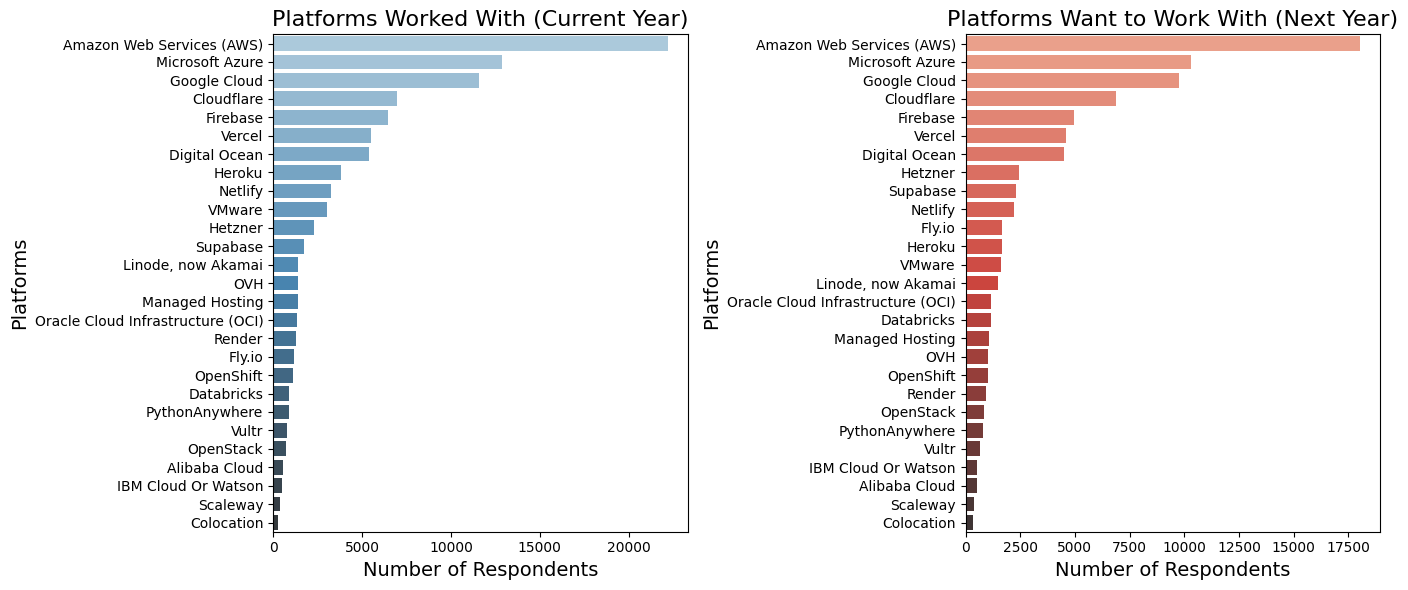

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting word count for platforms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Two subplots for current and next year

# Current Year Platform Count
sns.barplot(x=platforms_current_count.values, y=platforms_current_count.index, ax=axes[0], palette='Blues_d')
axes[0].set_title('Platforms Worked With (Current Year)', fontsize=16)
axes[0].set_xlabel('Number of Respondents', fontsize=14)
axes[0].set_ylabel('Platforms', fontsize=14)

# Next Year Platform Count
sns.barplot(x=platforms_next_year_count.values, y=platforms_next_year_count.index, ax=axes[1], palette='Reds_d')
axes[1].set_title('Platforms Want to Work With (Next Year)', fontsize=16)
axes[1].set_xlabel('Number of Respondents', fontsize=14)
axes[1].set_ylabel('Platforms', fontsize=14)

plt.tight_layout()
plt.show()


In [30]:
import pandas as pd


# Extracting platforms people have worked with and want to work with
platforms_current = df['PlatformHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
platforms_next_year = df['PlatformWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Count the occurrences of each platform (top 10 for both)
platforms_current_count = platforms_current.value_counts().head(10)
platforms_next_year_count = platforms_next_year.value_counts().head(10)

# Create a DataFrame with top 10 platforms for each year
platforms_current_df = pd.DataFrame({
    'Platform': platforms_current_count.index,
    'Year': ['Current Year'] * len(platforms_current_count),
    'Frequency': platforms_current_count.values
})

platforms_next_year_df = pd.DataFrame({
    'Platform': platforms_next_year_count.index,
    'Year': ['Next Year'] * len(platforms_next_year_count),
    'Frequency': platforms_next_year_count.values
})

# Combine both DataFrames for current and next year
platforms_data = pd.concat([platforms_current_df, platforms_next_year_df], ignore_index=True)

# Save the data to a CSV file
platforms_data.to_csv('top_10_platforms_for_dashboard.csv', index=False)

print("Top 10 platforms data saved as 'top_10_platforms_for_dashboard.csv'.")


Top 10 platforms data saved as 'top_10_platforms_for_dashboard.csv'.


In [32]:
import pandas as pd


# Extracting web frameworks people have worked with and want to work with
webframes_current = df['WebframeHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
webframes_next_year = df['WebframeWantToWorkWith'].dropna().str.split(';', expand=True).stack()

# Count the occurrences of each web framework (top 10 for both)
webframes_current_count = webframes_current.value_counts().head(20)
webframes_next_year_count = webframes_next_year.value_counts().head(20)

# Create a DataFrame with top 10 web frameworks for each year
webframes_current_df = pd.DataFrame({
    'WebFramework': webframes_current_count.index,
    'Year': ['Current Year'] * len(webframes_current_count),
    'Frequency': webframes_current_count.values
})

webframes_next_year_df = pd.DataFrame({
    'WebFramework': webframes_next_year_count.index,
    'Year': ['Next Year'] * len(webframes_next_year_count),
    'Frequency': webframes_next_year_count.values
})

# Combine both DataFrames for current and next year
webframes_data = pd.concat([webframes_current_df, webframes_next_year_df], ignore_index=True)

# Save the data to a CSV file
webframes_data.to_csv('top_20_webframeworks_for_dashboard.csv', index=False)

print("Top 20 web frameworks data saved as 'top_10_webframeworks_for_dashboard.csv'.")


Top 20 web frameworks data saved as 'top_10_webframeworks_for_dashboard.csv'.
